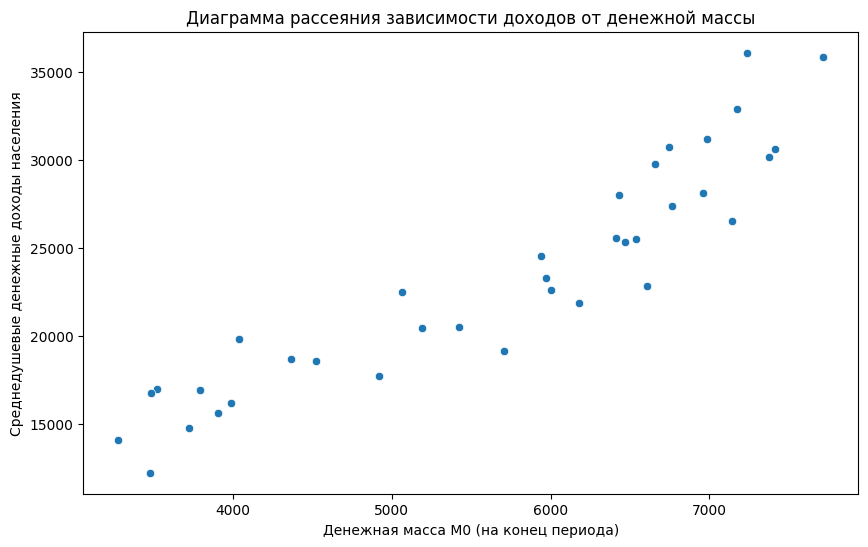

Коэффициент корреляции: 0.9247705275133775
p-значение: 7.906637040218396e-16


In [9]:
#Task_1
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import pearsonr

# Загрузка данных
file_path = 'КР_18_вариант.xlsx'
data = pd.read_excel(file_path)

# Очистка данных
data['Среднедушевые денежные доходы населения'] = data['Среднедушевые денежные доходы населения'].str.replace(' ', '').str.replace(',', '.').astype(float)
data['Денежная масса М0 (на конец периода)'] = data['Денежная масса М0 (на конец периода)'].str.replace(' ', '').str.replace(',', '.').astype(float)

# Эндогенная и экзогенная переменные
y = data['Среднедушевые денежные доходы населения']
x = data['Денежная масса М0 (на конец периода)']

# Построение диаграммы рассеяния
plt.figure(figsize=(10, 6))
sns.scatterplot(x=x, y=y)
plt.xlabel('Денежная масса М0 (на конец периода)')
plt.ylabel('Среднедушевые денежные доходы населения')
plt.title('Диаграмма рассеяния зависимости доходов от денежной массы')
plt.show()

# Коэффициент корреляции Пирсона
correlation_coefficient, p_value = pearsonr(x, y)
print("Коэффициент корреляции:", correlation_coefficient)
print("p-значение:", p_value)

In [10]:
#Task_2
import statsmodels.api as sm

# Добавляем константу к регрессору для выполнения регрессии
X = sm.add_constant(x)
model = sm.OLS(y, X).fit()

# Вывод результатов регрессии
print(model.summary())

# Средняя относительная ошибка аппроксимации
mean_relative_error = (abs((model.predict(X) - y) / y)).mean()
print("Средняя относительная ошибка аппроксимации:", mean_relative_error)


                                       OLS Regression Results                                      
Dep. Variable:     Среднедушевые денежные доходы населения   R-squared:                       0.855
Model:                                                 OLS   Adj. R-squared:                  0.851
Method:                                      Least Squares   F-statistic:                     200.8
Date:                                     Wed, 06 Nov 2024   Prob (F-statistic):           7.91e-16
Time:                                             15:58:48   Log-Likelihood:                -330.84
No. Observations:                                       36   AIC:                             665.7
Df Residuals:                                           34   BIC:                             668.8
Df Model:                                                1                                         
Covariance Type:                                 nonrobust                                         


In [21]:
#Task_3
from scipy.stats import shapiro

# Остатки модели
residuals = model.resid

# Тест Шапиро-Уилка
stat, p_value = shapiro(residuals)
print("Статистика теста Шапиро-Уилка:", stat)
print("p-значение:", p_value)
if p_value > 0.05:
    print("Остатки нормально распределены.")
else:
    print("Остатки не являются нормально распределенными.")


Статистика теста Шапиро-Уилка: 0.9838639968500245
p-значение: 0.8662827640144657
Остатки нормально распределены.


Статистика Бреуша-Пагана: 3.2026979599686465
p-значение: 0.07351689909451536
Гомоскедастичность подтверждается.


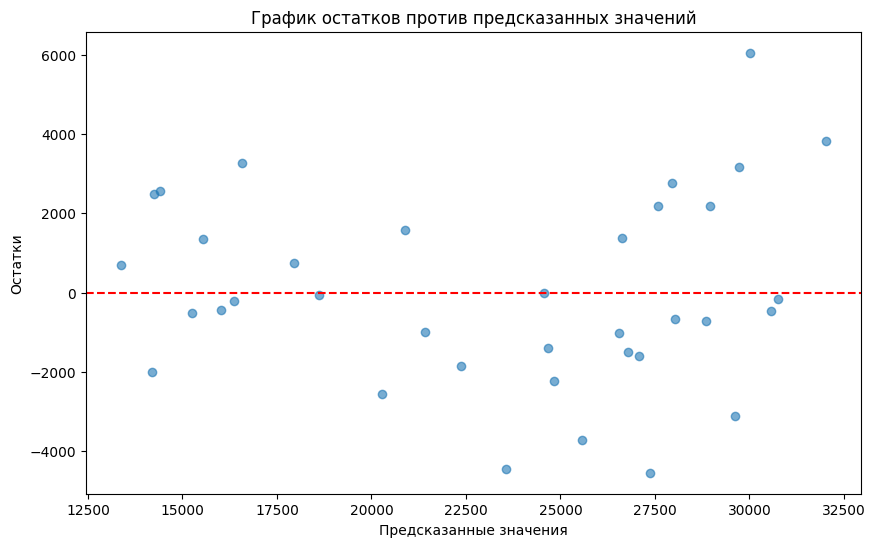

In [22]:
#Task_4
import matplotlib.pyplot as plt
from statsmodels.stats.diagnostic import het_breuschpagan

# Остатки модели
residuals = model.resid
predicted = model.fittedvalues

# Тест Бреуша-Пагана
bp_test = het_breuschpagan(residuals, X)
print("Статистика Бреуша-Пагана:", bp_test[0])
print("p-значение:", bp_test[1])
if bp_test[1] > 0.05:
    print("Гомоскедастичность подтверждается.")
else:
    print("Наблюдается гетероскедастичность.")

# Построение графика остатков против предсказанных значений
plt.figure(figsize=(10, 6))
plt.scatter(predicted, residuals, alpha=0.6)
plt.axhline(0, color='r', linestyle='--')
plt.xlabel("Предсказанные значения")
plt.ylabel("Остатки")
plt.title("График остатков против предсказанных значений")
plt.show()


Точечное прогнозное значение: 24494.09762781008
Доверительный интервал (95%): (np.float64(23650.485095831067), np.float64(25337.71015978909))


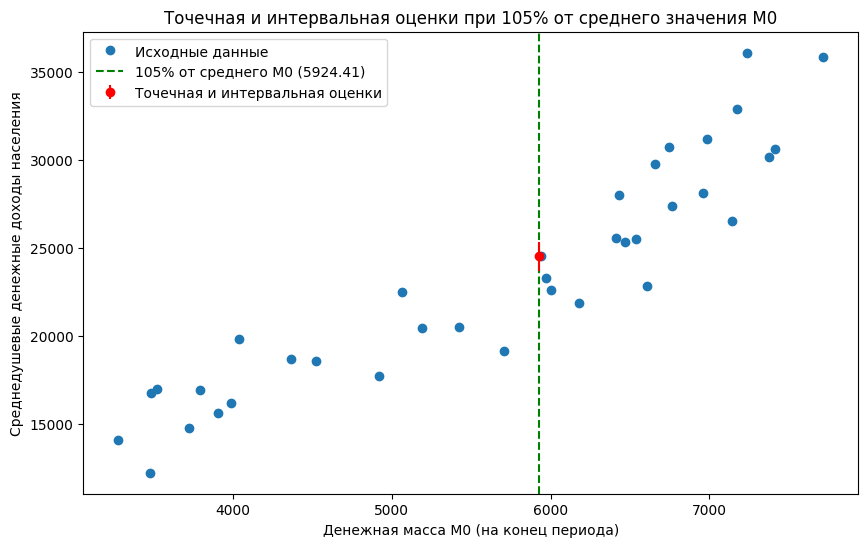

In [26]:
#Task_5
import numpy as np
import pandas as pd
import statsmodels.api as sm
import matplotlib.pyplot as plt

# Среднее значение экзогенной переменной (денежной массы М0)
mean_x = x.mean()
new_x_value = 1.05 * mean_x

# Создаем DataFrame для предсказания с новым значением экзогенной переменной
new_X = pd.DataFrame({'const': [1], 'Денежная масса М0 (на конец периода)': [new_x_value]})

# Прогнозное значение и доверительный интервал
prediction = model.get_prediction(new_X)
prediction_summary = prediction.summary_frame(alpha=0.05)

# Вывод результатов
point_estimate = prediction_summary['mean'][0]
lower_bound = prediction_summary['mean_ci_lower'][0]
upper_bound = prediction_summary['mean_ci_upper'][0]

print("Точечное прогнозное значение:", point_estimate)
print("Доверительный интервал (95%):", (lower_bound, upper_bound))

# Построение графика точечной и интервальной оценок
plt.figure(figsize=(10, 6))
plt.plot(x, y, 'o', label='Исходные данные')
plt.axvline(new_x_value, color='green', linestyle='--', label=f'105% от среднего M0 ({new_x_value:.2f})')
plt.errorbar(new_x_value, point_estimate, 
             yerr=[[point_estimate - lower_bound], [upper_bound - point_estimate]], 
             fmt='o', color='red', label='Точечная и интервальная оценки')
plt.xlabel("Денежная масса М0 (на конец периода)")
plt.ylabel("Среднедушевые денежные доходы населения")
plt.title("Точечная и интервальная оценки при 105% от среднего значения M0")
plt.legend()
plt.show()




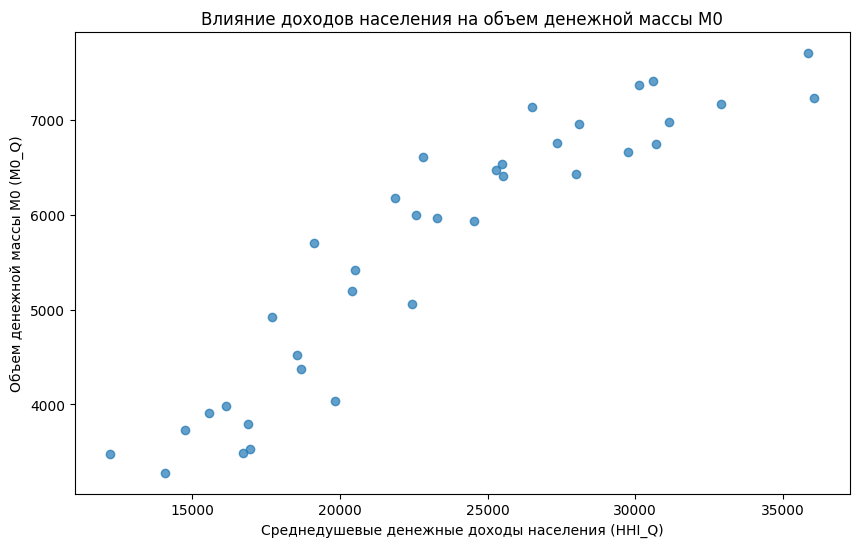

Коэффициент корреляции: 0.9247705275133775
p-значение: 7.906637040218396e-16
                            OLS Regression Results                            
Dep. Variable:                   M0_Q   R-squared:                       0.855
Model:                            OLS   Adj. R-squared:                  0.851
Method:                 Least Squares   F-statistic:                     200.8
Date:                Wed, 06 Nov 2024   Prob (F-statistic):           7.91e-16
Time:                        16:48:42   Log-Likelihood:                -276.35
No. Observations:                  36   AIC:                             556.7
Df Residuals:                      34   BIC:                             559.9
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------

In [27]:
#Task_6
import pandas as pd
import statsmodels.api as sm
import matplotlib.pyplot as plt
from scipy.stats import pearsonr

# Подготовка данных (если они уже очищены, этот шаг можно пропустить)
data['HHI_Q'] = data['Среднедушевые денежные доходы населения']
data['M0_Q'] = data['Денежная масса М0 (на конец периода)']

# Определение эндогенной и экзогенной переменных
y = data['M0_Q']  # зависимая переменная (денежная масса М0)
x = data['HHI_Q']  # независимая переменная (доходы населения)

# Построение диаграммы рассеяния
plt.figure(figsize=(10, 6))
plt.scatter(x, y, alpha=0.7)
plt.xlabel("Среднедушевые денежные доходы населения (HHI_Q)")
plt.ylabel("Объем денежной массы М0 (M0_Q)")
plt.title("Влияние доходов населения на объем денежной массы М0")
plt.show()

# Расчет коэффициента корреляции Пирсона
correlation_coefficient, p_value = pearsonr(x, y)
print("Коэффициент корреляции:", correlation_coefficient)
print("p-значение:", p_value)

# Добавление константы к экзогенной переменной
X = sm.add_constant(x)
model = sm.OLS(y, X).fit()

# Вывод результатов регрессии
print(model.summary())

# Средняя относительная ошибка аппроксимации
mean_relative_error = (abs((model.predict(X) - y) / y)).mean()
print("Средняя относительная ошибка аппроксимации:", mean_relative_error)
